In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

                                                                                                   SEGUNDA PREENTREGA

A - **PREPARACIÓN DE LOS DATOS**

1. Cargar el dataset
2. ver si existen filas duplicadas
3. ver para cada de las columnas si existen valores nulos
4. eliminar las filas que contiene nulos en la columna de practica de deportes (631/30641) -- 2% de los datos totales
5. reemplazar por la moda los valores nulos de las columnas categoricas y numericas (cantidad de hermanos)
6. Agrego columna de Score (promedio de las notas de matematicas, lectura y escritura)

1 - CARGAR EL DATASET

In [3]:
df=pd.read_csv('Exams/Expanded_data_with_more_features.csv', sep=',', decimal='.', index_col=0)
df.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


Se toma el dataset de la pagina de Kaggle, se limpia y se prepara para el analisis.

In [4]:
Stadist=df.describe() # ver los estadisticos de las variables numericas
Stadist

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


se ve los principales numeros de la data

2 - VER SI EXISTEN FILAS DUPLICADAS

In [5]:
df.duplicated().sum()

0

VEO LOS TIPOS DE VARIABLES DE CADA UNA DE LAS COLUMNAS

In [25]:
df.dtypes # ver los tipos de datos de las variables

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
Score                  float64
dtype: object

No existen filas duplicadas

3 - VER SI EXISTEN VALORES NULOS

In [6]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

4 - ELIMINAR LAS FILAS QUE CONTIENEN NULOS EN LA COLUMNA DE PRACTICA DE DEPORTES (631/30641) -- 2% DE LOS DATOS TOTALES

In [7]:
df.dropna(subset=['PracticeSport'], inplace=True)

5 - REEMPLAZAR POR LA MODA LOS VALORES NULOS DE LAS COLUMNAS CATEGORICAS Y NUMERICAS (CANTIDAD DE HERMANOS) 

In [8]:
## ver todas las modas de las columnas del dfset de los examenes de los chicos

moda=df.mode().iloc[0]
print("Moda: ", moda)

Moda:  Gender                       female
EthnicGroup                 group C
ParentEduc             some college
LunchType                  standard
TestPrep                       none
ParentMaritalStatus         married
PracticeSport             sometimes
IsFirstChild                    yes
NrSiblings                      1.0
TransportMeans           school_bus
WklyStudyHours               5 - 10
MathScore                        64
ReadingScore                     65
WritingScore                     67
Name: 0, dtype: object


In [9]:
df.fillna(moda, inplace=True) ## implace para que se guarde en el dfframe

In [10]:
df.isnull().sum() ## verifico que no haya valores nulos en cada uno las columnas

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

6 - AGREGO COLUMNA DE SCORE (PROMEDIO DE LAS NOTAS DE MATEMATICAS, LECTURA Y ESCRITURA)

In [11]:
## Agregar una columna del promedio de los 3 scores de cada alumno

df["Score"]=((df["MathScore"]+df["ReadingScore"]+df["WritingScore"])/3).round(0)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


Se agrega el promedio de los 3 exámenes y se agrega una columna con el promedio

El objetivo como científico de datos es investigar la posible relación entre la actividad física, el estado civil de los padres y el g
estudiantes, con los resultados de escritura, lectura y matemáticas en los exámenes. Este estudio tiene como propósito examinar cómo e
influir en el rendimiento académico de los estudiantes en las áreas mencionadas.

Para lograr este objetivo, se llevará a cabo un análisis de datos que incluirá la recopilación de información sobre la actividad físic
estado civil de sus padres y su género. 

Se recopilarán datos tanto objetivos como subjetivos sobre la actividad física de los estudiantes, utilizando dispositivos de seguimie
registros autoinformados. Además, se recopilará información sobre el estado civil de los padres, clasificando si son casados, solteros
Asimismo, se registrará el género de los estudiantes, identificando si son hombres o mujeres.

Posteriormente, se analizarán los resultados de escritura, lectura y matemáticas en los exámenes de los estudiantes. Se utilizarán téc
estadístico, para identificar posibles relaciones entre la actividad física, el estado civil de los padres, el género de los estudiant
estudio, cantidad de hermanos y el rendimiento académico (variables de confusión). Al controlar estas variables en el diseño y análisi
aislar el efecto específico de la actividad física en el resultado de interés y determinar si existe una relación directa entre ellos.
técnicas estadísticas adecuadas.

Audicencia

NUESTRA AUDIENCIA SON LOS PRINCIPALES ESTABLECIMIENTOS ACADÉMICOS PARA PODER PRESENTAR NUESTRO PROGRAMA INTEGRAL A LARGO PLAZO, QUE INCLUYE ACTIVIDADES FÍSICAS ESPECIFICAS PARA MEJORAR EL RENDIMIENTO ACADÉMICO DE SUS ESTUDIANTES.
SE IMPLEMENTARÁ CAPACITACIÓN A CADA DE LOS DOCENTES Y PERSONAL ESCOLAR PARA QUE PUEDA IMPLEMENTAR Y SUPERVISAR EL PROGRAMA DE ACTIVIDAD FÍSICA.
SE REALIZARÁN EVALUACIONES PERIÓDICAS PARA MEDIR EL IMPACTO DEL PROGRAMA EN EL RENDIMIENTO ACADÉMICO DE LOS ESTUDIANTES. ESTO PERMITIRÁ AJUSTAR Y MEJORAR CONTINUAMENTE EL PROGRAMA, DEMOSTRANDO ASÍ SU EFICACIA A LOS POTENCIALES CLIENTES.


Vamos a realizar una serie de preguntas para analizar nuestra audiencia y poder realizar un estudio de mercado. 

**Objetivo final**:

Establecer asociaciones a largo plazo con escuelas interesadas en mejorar el rendimiento académico de sus estudiantes a través de la actividad física, ofreciendo un programa efectivo respaldado por la investigación y demostrando resultados tangibles.


**PREGUNTA ÚTILES PARA ENTENDER LOS RESULTADOS**

Score de examenes en matematicas, lectura y escritura  por genero , nivel de educacion de los padres , por practica de deportes , cantidsad de estudio , etc.

1. ¿Cuáles son los Promedios de cada uno de los exámenes? 
2. ¿El genero influye en el promedio de los exámenes? y ¿cuales la cantidad de hombres y mujeres?
3. ¿incide el nivel de educacion de los padres en el promedio de los exámenes?
4. ¿como incide la cantidad de horas de estudio en los scores de los exámenes?
5. ¿incide la practica de deportes en el promedio de los examenes? -- **pregunta objetivo del proyecto**
   conclusion del estudio

1. **PROMEDIOS DE CADA UNO DE LOS EXÁMENES**

Vamos a ver como salieron los promedios totales de cada uno de las asignaturas que se tomo el estudio.

In [13]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,Score
count,30010.000000,30010.000000,30010.000000,30010.000000,30010.000000
mean,2.087404,66.556748,69.373109,68.416495,68.114195
std,1.442440,15.372186,14.768449,15.450080,14.465801
min,0.000000,0.000000,10.000000,4.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000,68.000000
75%,3.000000,78.000000,80.000000,79.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000


<Axes: xlabel='variable', ylabel='value'>

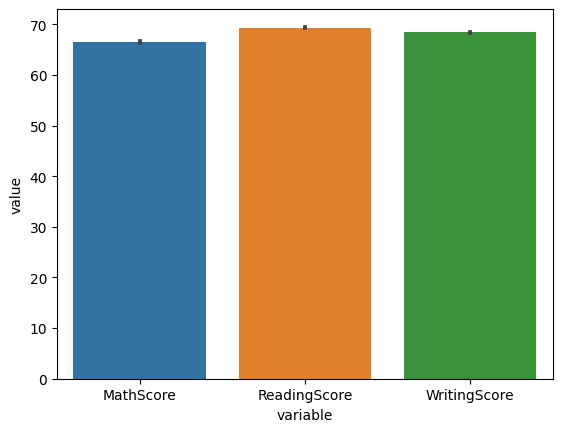

In [14]:
data=pd.DataFrame(df,columns=["MathScore","ReadingScore","WritingScore"])
data1=unpivoted = data.melt()
sns.barplot(x="variable", y="value", data=data1)

Se observa que los alumnos en este informe , tiene un buen promedios en los examenes de matematicas , lectura y escirtura. lo que se puede observar que en matematicas esta un poco por debajo con respecto a las otros examenes. 
matematicas el score es un 4.24 % por debajo de lectura y un 2.8% por debajo de escritur. 

2. **PROMEDIOS DE LOS EXÁMENES POR GÉNERO** (FEMENINO Y MASCULINO)

Aca vamos a ver como se comportan los promedios de los examenes por genero. y se puede ver diferencias sobre todo en el examen de matematicas, donde los hombres tienen un mayor promedios que las mujeres, en lectura y escritura las mujeres tienen un mayor promedio que los hombres.


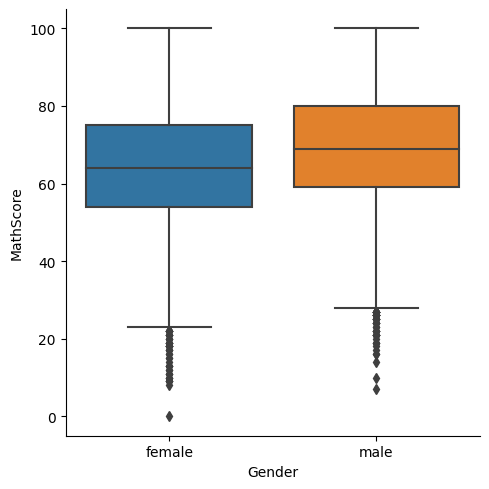

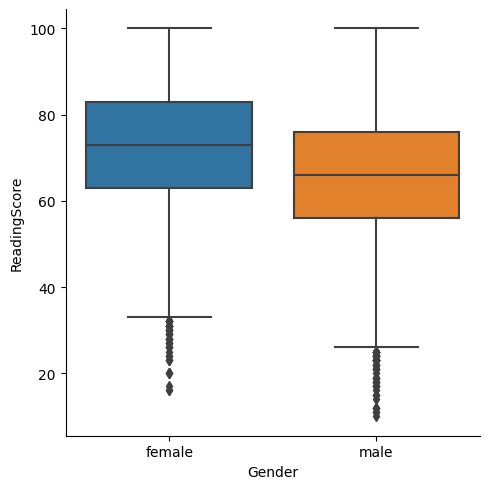

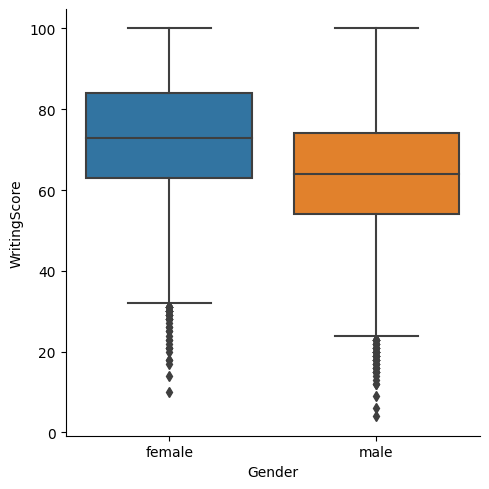

In [15]:
sns.catplot(x="Gender", y="MathScore", data=df, kind="box")
sns.catplot(x="Gender", y="ReadingScore", data=df, kind="box")
sns.catplot(x="Gender", y="WritingScore", data=df, kind="box")

In [16]:
cuadro1=pd.DataFrame(data=df,columns=["Gender","Score"])
cuadro2=cuadro1.groupby("Gender").mean()
cuadro2

,Score
Gender,
female,69.923520
male,66.281325


EL Score representa el promedio de los tres examenes que realizaron los alumnos. En mismo se  Observa que las mujeres tienen un promedio general de los 3 examenes mayor a los hombres un 5.5% mayor. 

En tota de los alumnos que participaron en este estudio , 30641 estudiantes de los cuales las mujeres representan un 50.4% y los hombres un 49.6% del total de los alumnos. es decir parejo la cantidad de hombres y mujeres.

In [17]:
df.shape

(30010, 15)

Gender
female    15102
male      14908
dtype: int64


<Axes: xlabel='Gender'>

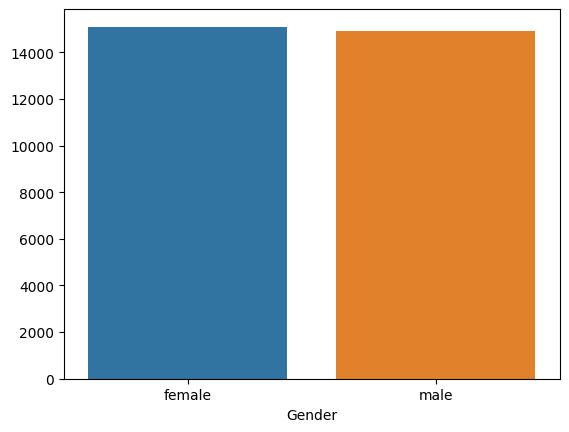

In [18]:
cantidad=df.groupby("Gender").size()
print(cantidad)
sns.barplot(x=cantidad.index, y=cantidad.values)

3. **PROMEDIOS DE LOS EXÁMENES, SEGÚN EL NIVEL DE EDUCACIÓN DE LOS PADRES** 
¿incide en el promedio de los examenes?

Aca nos pregutamos como el nivel de educacion en la familia puede influir en los scores de los alumnos

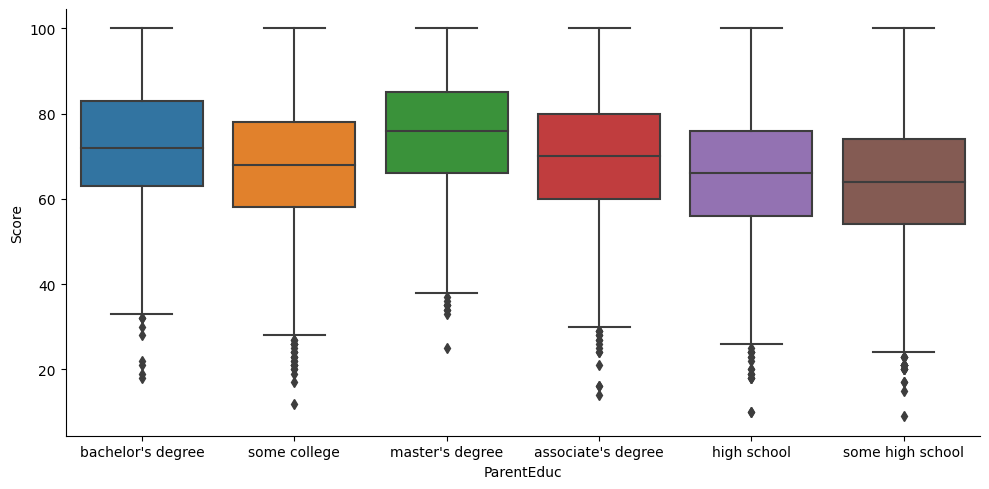

In [19]:
sns.catplot(data=df,x="ParentEduc",y="Score",kind="box",aspect=2)

Aca esta los principales score por nivel de educacion de los padres , se observa que los alumnos que tienen padres con un nivel de educacion de bachillerato y superior tienen mejores resultados en los examenes que los alumnos que tienen padres con un nivel de educacion de secundaria y primaria.

4. **CANTIDAD DE HORAS DE ESTUDIO DE LOS ALUMNOS**

la cantidad de los horas de alumnmos estudian incide en los scores de los examenes? 

esta pregunta apriori se puede pensar que si , pero vamos a ver que nos dice los datos. 

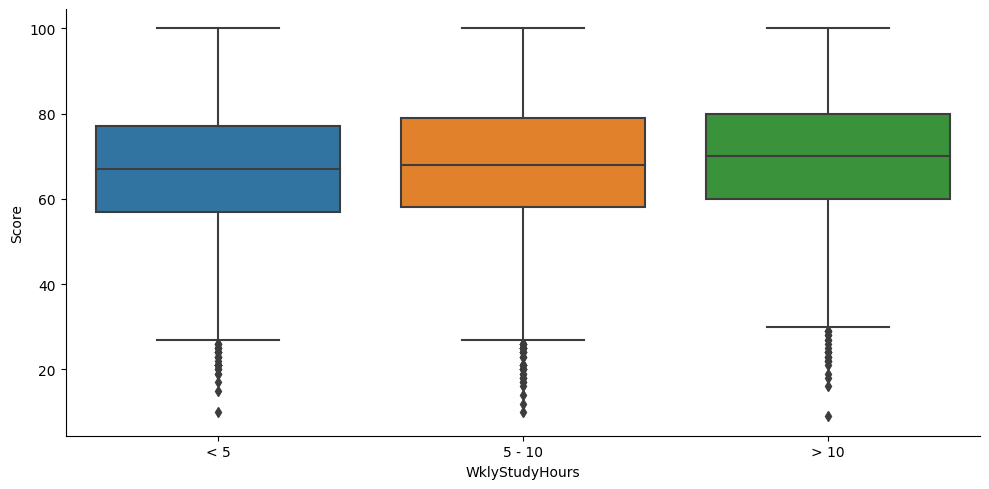

In [20]:
sns.catplot(data=df,x="WklyStudyHours",y="Score",kind="box",aspect=2)

se puede observar que los promedios por cantidad de horas, estan mit parejos en lineas generales, pero cuanta mayor cantidad de horas estudian , se ve un leve aumento en los promedios de los examenes.
vamos a ver como se comporta en cada uno de los examenes por separado.

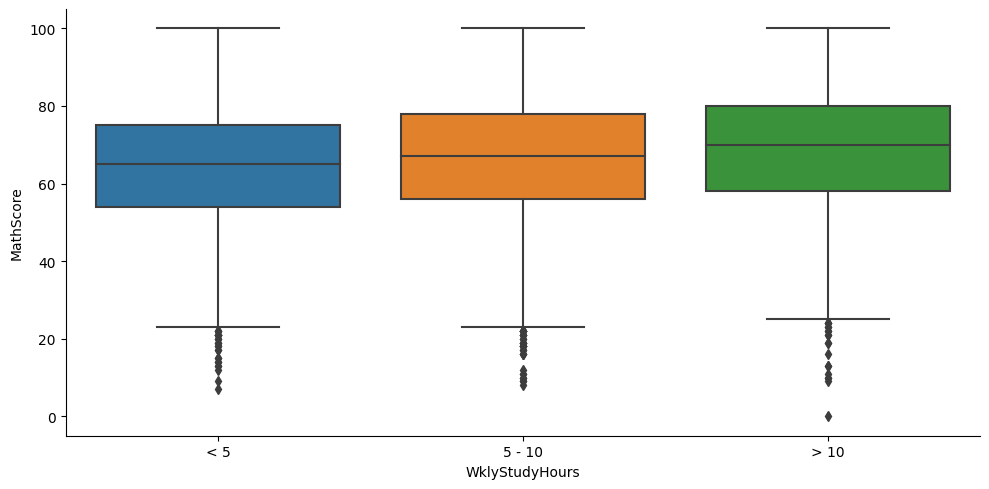

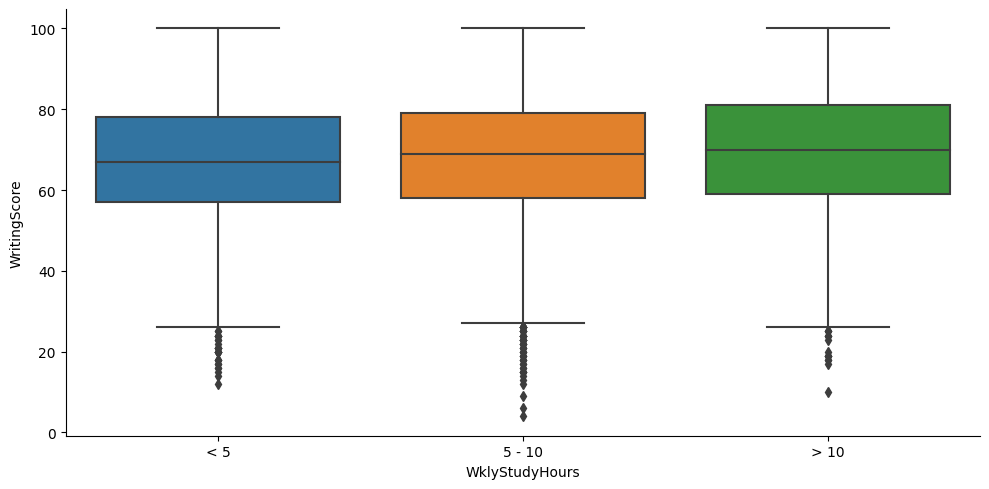

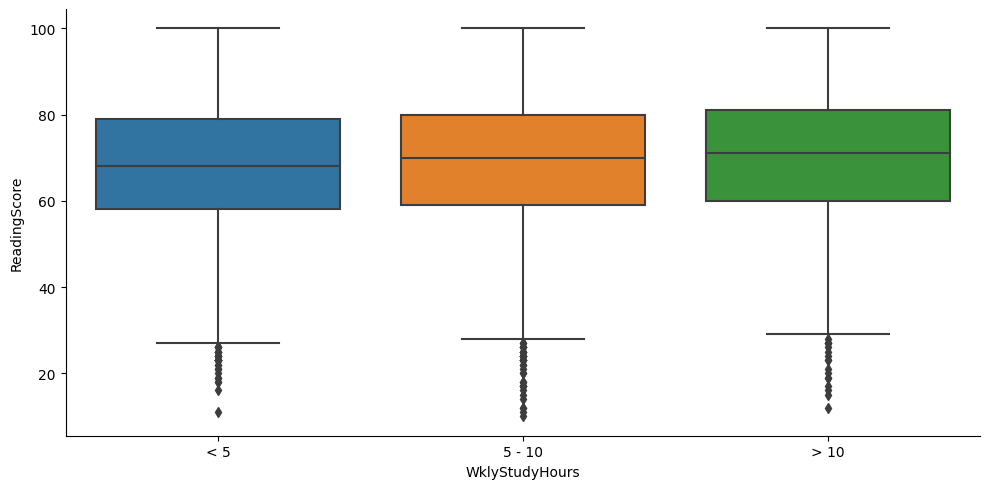

In [21]:
sns.catplot(data=df,x="WklyStudyHours",y="MathScore",kind="box",aspect=2)
sns.catplot(data=df,x="WklyStudyHours",y="WritingScore",kind="box",aspect=2)
sns.catplot(data=df,x="WklyStudyHours",y="ReadingScore",kind="box",aspect=2)

Se puede ver claramente que en matematica la cantidad de horas de estudio tiene un mejor promedio, en lectura y escritura no se ve una diferencia tan marcada.

5. **PROMEDIOS DE LOS EXÁMENES, SEGÚN LA PRÁCTICA DE DEPORTES**   --  OBJETIVO PRINCIPÁL DEL PROYECTO

vamos a ver como incide la practica de deportes en los promedios de los examenes. es nuestro principal objetivo para este proyecto. 
Nosotros pensamos que la actividad fisica es muy importante para el desarrollo y la salud de los alumnos. Vamos a ver este estudio como el mismo incidio en el resultado de los examenes.

<Axes: xlabel='PracticeSport', ylabel='Score'>

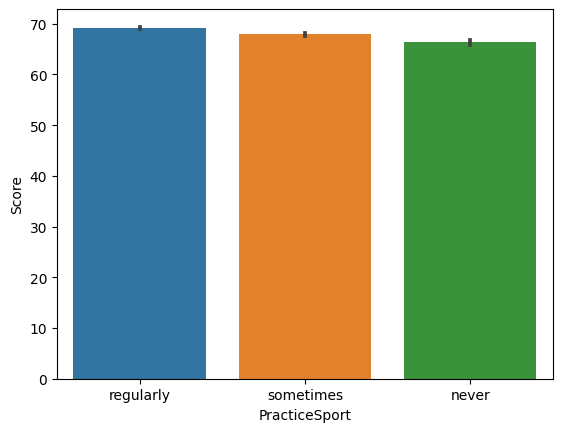

In [17]:
sns.barplot(data=df,x="PracticeSport",y="Score")

Se observa que los alumnos que practican deportes tienen un mejor promedio en los examenes que los alumnos que no practican deportes. 
Ahora vamos a ver como se comporta en cada uno de los examenes por separado para ver si se mantiene la tendencia.  

<Axes: xlabel='PracticeSport', ylabel='MathScore'>

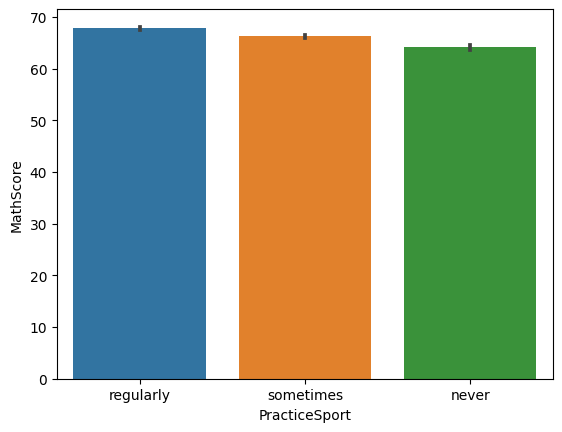

In [18]:
sns.barplot(data=df,x="PracticeSport",y="MathScore")

En matematicas se observa resultados muy similares entre los alumnos que practican deportes y los que no practican deportes que el promedio de los 3 examenes.

<Axes: xlabel='PracticeSport', ylabel='ReadingScore'>

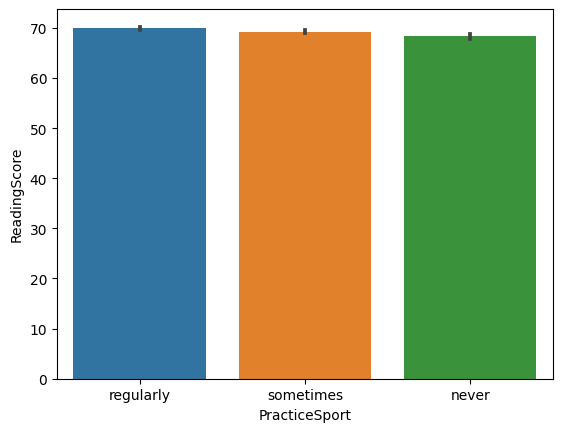

In [19]:
sns.barplot(data=df,x="PracticeSport",y="ReadingScore")

<Axes: xlabel='PracticeSport', ylabel='WritingScore'>

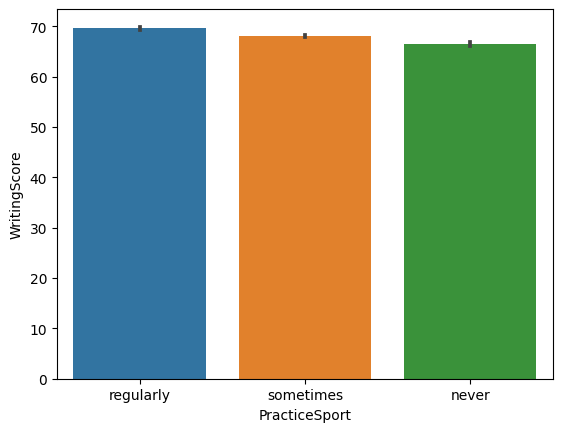

In [20]:
sns.barplot(data=df,x="PracticeSport",y="WritingScore")

Se puede ver que en matematicas y escritura los alumnos que practican deportes tienen un mejor promedio que los alumnos que no practican deportes. en lectura no se ve una diferencia tan marcada.

**CONCLUSIONES:**

En este estudiuo se analizo varios aspectos de como incide en los scores de los examenes de los alumnos, como el genero , el nivel de educacion de los padres , la cantidad de horas de estudio y la practica de deportes.
con respecto al genero se observa que las mujeres tienen un mejor promedio que los hombres en escritura y en lectura, pero en matematicas los hombres tienen un mejor promedio que las mujeres, esto no quiere decir que el universo de todos examenes se comporte de esta manera.
con respecto al nivel de educacion de los padres, se observa que los alumnos que tienen padres con un nivel de educacion de bachillerato y superior tienen mejores resultados en los examenes que los alumnos que tienen padres con un nivel de educacion de secundaria y primaria, pero los resultados son muy parejos en lineas generales.
La cantidad horas de estudios, si me causo una sorpresa con respecto a lo que tenia pensado, ya que el mismo no incide tanto en los resultados, donde mas incide , que es bastante logico es en matematicas.
La practica de deportes, si incide en los resultados de los examenes, los alumnos que practican deportes tienen un mejor promedio en los examenes que los alumnos que no practican deportes en lineas generale, pero se observa una mayor incidencia en matematicas y escritura que en lectura.

**DATA CON OBTENCIÓN DE INSGHTS**

Vamos a ver los Insights que nos dejo este estudio y tambien poder sacar otros datos para poder seguir analizando y sacar mas conclusiones al respecto. Usando la bivariate analysis.

Vamos a ver ahora si existen una correlacion entre las variables de nuestro estudio. Para eso tenemos que hacer una par de modificaciones a base para poder hacer el analisis de correlacion.

In [21]:
df1=df.query("PracticeSport == 'never'") ## se filtra el dataset para que solo contenga los que nunca practican deporte
df1.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,Score
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,2.126374,64.171079,68.337662,66.522727,66.346653
std,1.455309,14.870058,14.641246,15.328275,14.259566
min,0.000000,10.000000,11.000000,4.000000,10.000000
25%,1.000000,54.000000,59.000000,56.000000,57.000000
50%,2.000000,64.000000,68.000000,67.000000,67.000000
75%,3.000000,75.000000,79.000000,78.000000,77.000000
max,7.000000,100.000000,99.000000,100.000000,99.000000


In [27]:
df2=df.query("PracticeSport != 'never'") ## se filtra el dataset para que solo contenga los que practican deporte (a veces o siempre)
df2.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,Score,ActividadFisica,NivelEducPadres,female,male
count,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000,26637.000000
mean,2.081203,66.917258,69.533844,68.703608,68.382813,1.405188,1.864624,0.503210,0.496790
std,1.440690,15.402464,14.770508,15.440947,14.467561,0.490938,1.574236,0.499999,0.499999
min,0.000000,0.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,56.000000,59.000000,58.000000,58.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,67.000000,70.000000,69.000000,69.000000,1.000000,2.000000,1.000000,0.000000
75%,3.000000,78.000000,80.000000,80.000000,79.000000,2.000000,3.000000,1.000000,1.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000,2.000000,5.000000,1.000000,1.000000


In [28]:
df3=df.query("PracticeSport == 'regularly'") ## se filtra el dataset para que solo contenga los que practican deporte siempre
df3.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,Score,ActividadFisica,NivelEducPadres,female,male
count,10793.000000,10793.000000,10793.000000,10793.000000,10793.000000,10793.0,10793.000000,10793.000000,10793.000000
mean,2.069582,67.839155,69.943019,69.604003,69.128324,2.0,1.846938,0.506254,0.493746
std,1.439886,15.642784,14.898551,15.513306,14.604463,0.0,1.582227,0.499984,0.499984
min,0.000000,0.000000,17.000000,10.000000,9.000000,2.0,0.000000,0.000000,0.000000
25%,1.000000,57.000000,60.000000,59.000000,59.000000,2.0,0.000000,0.000000,0.000000
50%,2.000000,68.000000,70.000000,70.000000,69.000000,2.0,2.000000,1.000000,0.000000
75%,3.000000,79.000000,81.000000,80.000000,80.000000,2.0,3.000000,1.000000,1.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000,2.0,5.000000,1.000000,1.000000


lo que Nunca realizaron ejercicios se observo los siguientes promedios  en matemáticas 64.1, en Lectura 68.3 y en Escritura 66.5 
lo que realizan algunas veces ejercicios se observó 66,3 en matemáticas,69.2 en lectura y 68.0 en escritura
 y lo que siempre hacen ejercicios, en matemáticas **67.8**,en lectura **69.9** y en escritura **69.6**

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["never","sometimes","regularly"]]) # create the encoder object to encode categorical variables
encoder.fit(df[["PracticeSport"]]) # encode the categorical variable
df["ActividadFisica"] = encoder.transform(df[["PracticeSport"]]) # assign the encoded variable to a new column
df.head(5) # display the first 5 rows to check if the data was imported correctly


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score,ActividadFisica
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0,2.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0,1.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0,1.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0,0.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0,1.0


In [23]:
encoder = OrdinalEncoder (categories=[["some college","some high school","high school","associate's degree","bachelor's degree","master's degree"]]) # se crea el objeto para codificar las variable
encoder.fit(df[["ParentEduc"]]) # se codifican las variables categoricas
df[["NivelEducPadres"]]=encoder.transform(df[["ParentEduc"]]) # se codifican las variables categoricas
data=df.drop(columns=["ParentEduc"]) # se eliminan las columnas que no se van a utilizar
df.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score,ActividadFisica,NivelEducPadres
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0,2.0,4.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0,1.0,0.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0,1.0,5.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0,0.0,3.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0,1.0,0.0


Se establece un orden para poder ver los niveles de educacion de los padres y poder hacer el analisis de correlacion.

In [24]:
dummies = pd.get_dummies(df["Gender"]) # se crea un dataframe con las variables categoricas
dummies.head(5) # muestreo de los primeros 5 registros para ver la estructura de los datos, para ver si se importaron correctamente
df=pd.concat([df,dummies],axis=1) # se concatenan los dataframes


Lo que se hizo en este caso , es transformar las variables categoricas en numericas para poder hacer el analisis de correlacion.

In [25]:
correlacion=df.corr(method='spearman') # correlacion de las variables
print(correlacion) # se imprime la correlacion

                 NrSiblings  MathScore  ReadingScore  WritingScore     Score  \
NrSiblings         1.000000  -0.001924      0.000055     -0.000523 -0.000779   
MathScore         -0.001924   1.000000      0.808669      0.796358  0.914700   
ReadingScore       0.000055   0.808669      1.000000      0.949953  0.967449   
WritingScore      -0.000523   0.796358      0.949953      1.000000  0.963590   
Score             -0.000779   0.914700      0.967449      0.963590  1.000000   
ActividadFisica   -0.011412   0.071182      0.031016      0.059154  0.056393   
NivelEducPadres   -0.007801   0.113762      0.122027      0.137773  0.130930   
female             0.002181  -0.156658      0.232952      0.285630  0.124251   
male              -0.002181   0.156658     -0.232952     -0.285630 -0.124251   

                 ActividadFisica  NivelEducPadres    female      male  
NrSiblings             -0.011412        -0.007801  0.002181 -0.002181  
MathScore               0.071182         0.113762 -0.15

/var/folders/y8/3xc807fn6xj09jzhy69h8y_40000gn/T/ipykernel_1182/4234295243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr(method='spearman') # correlacion de las variables


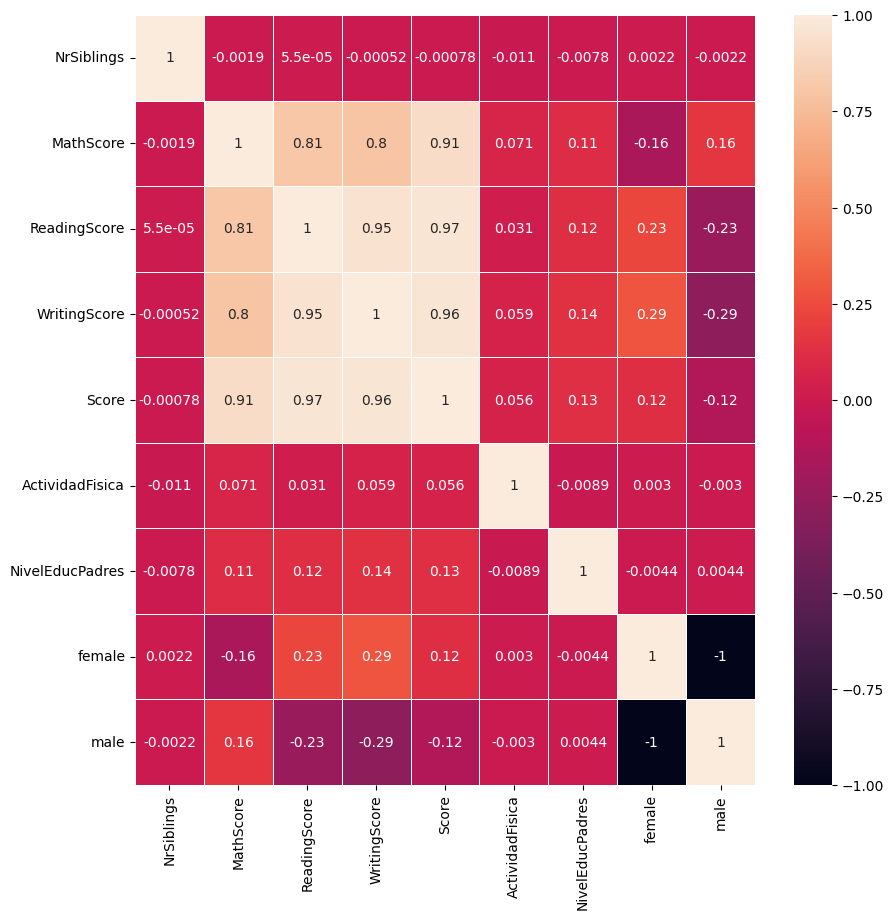

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) # se crea el objeto para graficar
sns.heatmap(correlacion, annot=True, linewidths=.7, ax=ax) # se grafica la correlacion
plt.show() # se muestra la grafica


se puede observar varias cosas, no hay una relacion fuerte entre las variables actividad fisica, el nivel de educacion de los padres y el genero , si lo que se puede ver que el mas fuerte de ellos es el género. se puede ver que en escritura y lectura la relacion entre el sexo masculino y los estos scores son negativos y en matematicas son positivos, igual no es fuerte , y la inversa en el genero femenino.

Con respecto a la actividad fisica la correlacion es casi nula , pero en matematicas y escritura son la mas fuerte de las 3 asignaturas. ¿Esto quiere decir que la actividad fisica no incide en los scores de los examenes de los alumnos?, bueno no lo podemos confirmar con este analisis de correlacion , pero si en las medias que vimnos anteriormente que , si incide en los scores de los examenes de los alumnos.

**VALORES ATIPICOS**

In [22]:
Estadisticas=df['Score'].describe()

In [23]:
Q1 = Estadisticas.loc['25%']
Q3 = Estadisticas.loc['75%']
IQR = Q3 - Q1
print(IQR)

21.0


In [24]:
valores_atipicos=(df['Score']< (Q1 - 1.5 * IQR)) | (df['Score'] > (Q3 + 1.5 * IQR))
df[valores_atipicos]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Score
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28,26.0
59,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10,9.0
76,male,group E,some high school,standard,none,married,sometimes,no,5.0,school_bus,5 - 10,28,25,21,25.0
327,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19,24.0
596,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,male,group C,associate's degree,free/reduced,completed,single,never,yes,1.0,school_bus,< 5,26,25,27,26.0
620,male,group C,associate's degree,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,27,26,23,25.0
947,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21,20.0
834,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4,14.0


Son 85 filas sobre los 30010 filas del dataset sin los nulos de la columna practica de deportes, puede proceder a eliminarlos del dataset, pero por ahora prefiero dejarlos, ya que no son tantos y no afectan tanto al dataset, en caso que el modelo no funcione bien, se puede volver a este punto y eliminarlos

**EN LAS PRUEBAS POSTERIORES DEL MODELO , VOY A PROBAR SOLO USAR LA VARIABLE SCORE  Y NO LOS 3 SCORES DE LOS EXAMENES. YA QUE LOS 3 SCORE TIENEN ALTA CORRELACION ENTRE ELLOS.**